# Task 1: Titanic Survival Prediction

Libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
dataset = pd.read_csv('tested.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
dataset.shape

(418, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


 Data Visualization

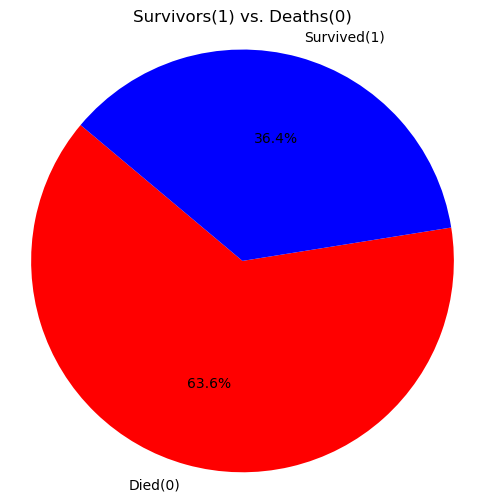

In [15]:
#Pie chart for survivors and deatho
survival_counts = dataset['Survived'].value_counts()
colors = ['red', 'blue']

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=['Died(0)', 'Survived(1)'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Survivors(1) vs. Deaths(0)')
plt.axis('equal')  
plt.show()

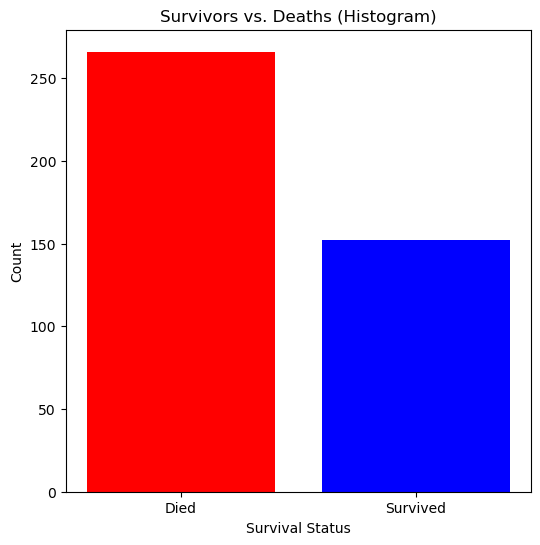

In [17]:
survival_counts = dataset['Survived'].value_counts()

#bar plot (histogram) for survivors vs. deaths
plt.figure(figsize=(6, 6))
plt.bar(survival_counts.index, survival_counts.values, color=['red', 'blue'])
plt.xticks(survival_counts.index, ['Died', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survivors vs. Deaths (Histogram)')
plt.show()

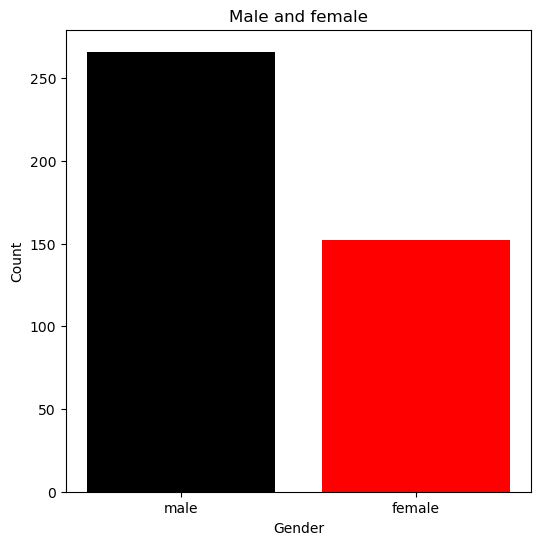

In [20]:
#Sex feature
gender_counts = dataset['Sex'].value_counts()

# bar plot (histogram)
plt.figure(figsize=(6, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['black', 'red'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Male and female')
plt.show()

Feature Engineering

In [40]:
# Data preprocessing:
X_age = dataset[['Age']]

# Handle missing values in 'Age' using median imputation
imputer_age = SimpleImputer(strategy='median')
X_age['Age'] = imputer_age.fit_transform(X_age[['Age']])
print(X_age['Age'])


12     23.0
14     47.0
24     48.0
26     22.0
28     41.0
       ... 
404    43.0
405    20.0
407    50.0
411    37.0
414    39.0
Name: Age, Length: 87, dtype: float64


C:\Users\kk50h\AppData\Local\Temp\ipykernel_1372\1508236315.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_age['Age'] = imputer_age.fit_transform(X_age[['Age']])


In [42]:
X_cabin = dataset[['Cabin']]
X_cabin.drop(columns=['Cabin'], inplace=True)
print(X_cabin)

Empty DataFrame
Columns: []
Index: [12, 14, 24, 26, 28, 34, 44, 46, 48, 50, 53, 57, 59, 64, 68, 69, 73, 74, 75, 77, 81, 92, 96, 100, 109, 112, 114, 117, 118, 122, 131, 142, 150, 156, 158, 166, 177, 178, 179, 181, 182, 184, 196, 202, 208, 215, 218, 222, 234, 236, 239, 242, 245, 252, 270, 272, 287, 293, 305, 306, 308, 314, 316, 321, 322, 326, 331, 335, 343, 350, 355, 356, 364, 371, 372, 374, 378, 390, 391, 395, 397, 400, 404, 405, 407, 411, 414]

[87 rows x 0 columns]


C:\Users\kk50h\AppData\Local\Temp\ipykernel_1372\87725362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cabin.drop(columns=['Cabin'], inplace=True)


In [44]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

X = dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = dataset['Survived']
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['Embarked'] = label_encoder.fit_transform(X['Embarked'])
imputer = SimpleImputer(strategy='median')
X['Age'] = imputer.fit_transform(X[['Age']])
X['Embarked'] = imputer.fit_transform(X[['Embarked']])


C:\Users\kk50h\AppData\Local\Temp\ipykernel_1372\3064209652.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = label_encoder.fit_transform(X['Sex'])
C:\Users\kk50h\AppData\Local\Temp\ipykernel_1372\3064209652.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = label_encoder.fit_transform(X['Embarked'])
C:\Users\kk50h\AppData\Local\Temp\ipykernel_1372\3064209652.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Modeling

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Model prediction based on survivals

In [51]:
y_pred = model.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df)

     Actual  Predicted
378       0          0
12        1          1
114       1          1
96        1          1
59        1          1
335       0          0
53        1          1
75        0          0
28        0          0
343       1          1
407       0          0
326       1          1
252       0          0
397       1          1
405       0          0
322       0          0
156       1          1
395       1          1


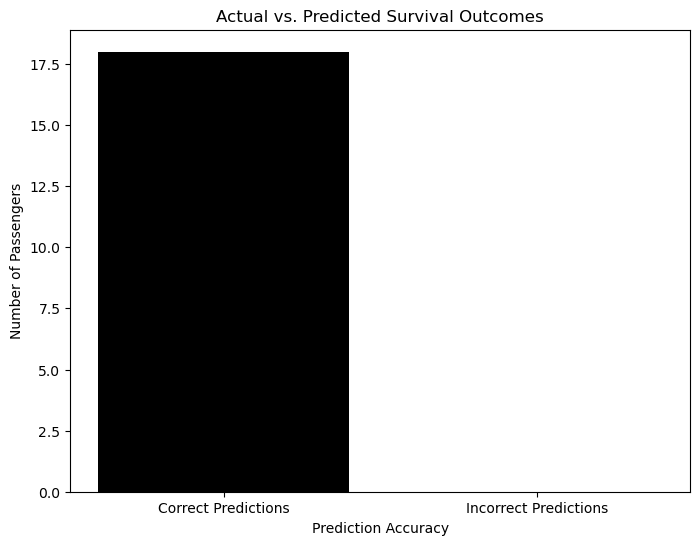

In [53]:
correct_predictions = results_df[results_df['Actual'] == results_df['Predicted']]
incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]

#bar plot to visualize the predictions
plt.figure(figsize=(8, 6))
plt.bar(['Correct Predictions', 'Incorrect Predictions'], [len(correct_predictions), len(incorrect_predictions)], color=['black', 'red'])
plt.title('Actual vs. Predicted Survival Outcomes')
plt.xlabel('Prediction Accuracy')
plt.ylabel('Number of Passengers')
plt.show()